# Week 1 – Linear Regression

This notebook focuses on applying linear regression with polynomial terms, interaction terms, multicollinearity, variance inflation factor and regression, and categorical and continuous features.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [98]:
df = pd.read_csv('Hospital_Inpatient_Discharge_2.csv')
df.head()

/tmp/ipykernel_6885/4161999977.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Hospital_Inpatient_Discharge_2.csv')


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,320922.43,60241.34
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,61665.22,9180.69
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,42705.34,11366.50
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,72700.17,12111.75
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,55562.51,8339.72


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                99721 non-null   object 
 1   Hospital County                      99721 non-null   object 
 2   Operating Certificate Number         99721 non-null   float64
 3   Permanent Facility Id                99721 non-null   float64
 4   Facility Name                        100001 non-null  object 
 5   Age Group                            100001 non-null  object 
 6   Zip Code - 3 digits                  97970 non-null   object 
 7   Gender                               100001 non-null  object 
 8   Race                                 100001 non-null  object 
 9   Ethnicity                            100001 non-null  object 
 10  Length of Stay                       100001 non-null  object 
 11  Type of Admis

In [100]:
df.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,9.972100e+04,99721.000000,100001.0,100001.000000,100001.000000,100001.000000,1.000010e+05,1.000010e+05
mean,5.785934e+06,1170.998235,2021.0,410.313127,10.259857,2.268227,7.543696e+04,2.415419e+04
std,1.947348e+06,544.852359,0.0,249.024517,6.101876,1.011051,1.318692e+05,3.972689e+04
min,1.010000e+05,1.000000,2021.0,1.000000,0.000000,0.000000,1.456000e+01,1.330000e+00
25%,4.324000e+06,776.000000,2021.0,183.000000,5.000000,1.000000,2.144916e+04,7.296590e+03
50%,7.001008e+06,1301.000000,2021.0,382.000000,9.000000,2.000000,4.121591e+04,1.378250e+04
75%,7.002024e+06,1456.000000,2021.0,640.000000,15.000000,3.000000,8.199042e+04,2.720545e+04
max,7.003010e+06,9059.000000,2021.0,956.000000,25.000000,4.000000,8.421962e+06,2.239309e+06


Check that target variable has no missing values and it's all integers. 

In [101]:
df['Length of Stay'].value_counts(dropna=False)

Length of Stay
2      20799
1      17802
3      13448
4       9102
5       6806
       ...  
117        1
92         1
79         1
101        1
110        1
Name: count, Length: 117, dtype: int64

Check how mnay distinct values CCSR Diagnosis Desciption has

In [102]:
df['CCSR Diagnosis Description'].value_counts(dropna=False)

CCSR Diagnosis Description
COVID-19                                                                        9823
Liveborn                                                                        8094
Septicemia                                                                      7551
Schizophrenia spectrum and other psychotic disorders                            2813
Heart failure                                                                   2453
                                                                                ... 
Complication of genitourinary device, implant or graft, subsequent encounter       1
Contraceptive and procreative management                                           1
Hearing loss                                                                       1
Endocrine system cancers - adrenocortical                                          1
Adverse effects of drugs and medicaments, initial encounter                        1
Name: count, Length: 441, dtype: int64

Select predictive features and check missing values

In [103]:
cols_to_keep = [
    "Gender",
    "Type of Admission",
    "Age Group",
    "CCSR Diagnosis Description",
    "APR Risk of Mortality",
    "APR Medical Surgical Description",
    "Length of Stay"
]
df_model = df[cols_to_keep].copy()

df_model.isna().sum()

Gender                               0
Type of Admission                    0
Age Group                            0
CCSR Diagnosis Description           0
APR Risk of Mortality               23
APR Medical Surgical Description     0
Length of Stay                       0
dtype: int64

Drop missing values

In [104]:
df_model = df_model.dropna(subset=["APR Risk of Mortality"])

In [105]:
df_model["Length of Stay"] = (
    df_model["Length of Stay"]
    .astype(str)
    .str.replace("+", "", regex=False)
    .astype(float)
)

Applying mapping to the APR Risk of Mortality feature

In [106]:
mortality_map = {
    "Minor": 1,
    "Moderate": 2,
    "Major": 3,
    "Extreme": 4
}

df_model["APR Risk of Mortality"] = df_model["APR Risk of Mortality"].map(mortality_map)

Get the top 5 values for CCSR Diagnosis Descriptions and assign "Other" to the rest

In [107]:
top_diagnoses = df_model["CCSR Diagnosis Description"].value_counts().nlargest(5).index

df_model["CCSR Diagnosis Description"] = df_model["CCSR Diagnosis Description"].apply(
    lambda x: x if x in top_diagnoses else "Other"
)

df_model["CCSR Diagnosis Description"].value_counts()


CCSR Diagnosis Description
Other                                                   69247
COVID-19                                                 9823
Liveborn                                                 8091
Septicemia                                               7551
Schizophrenia spectrum and other psychotic disorders     2813
Heart failure                                            2453
Name: count, dtype: int64

Encode the rest of the features

In [108]:
df_model = pd.get_dummies(df_model, columns=["Gender", "Type of Admission","CCSR Diagnosis Description", "Age Group","APR Medical Surgical Description"], drop_first=True)

In [109]:
X = df_model.drop(columns='Length of Stay')
y = df_model['Length of Stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

Check correlation

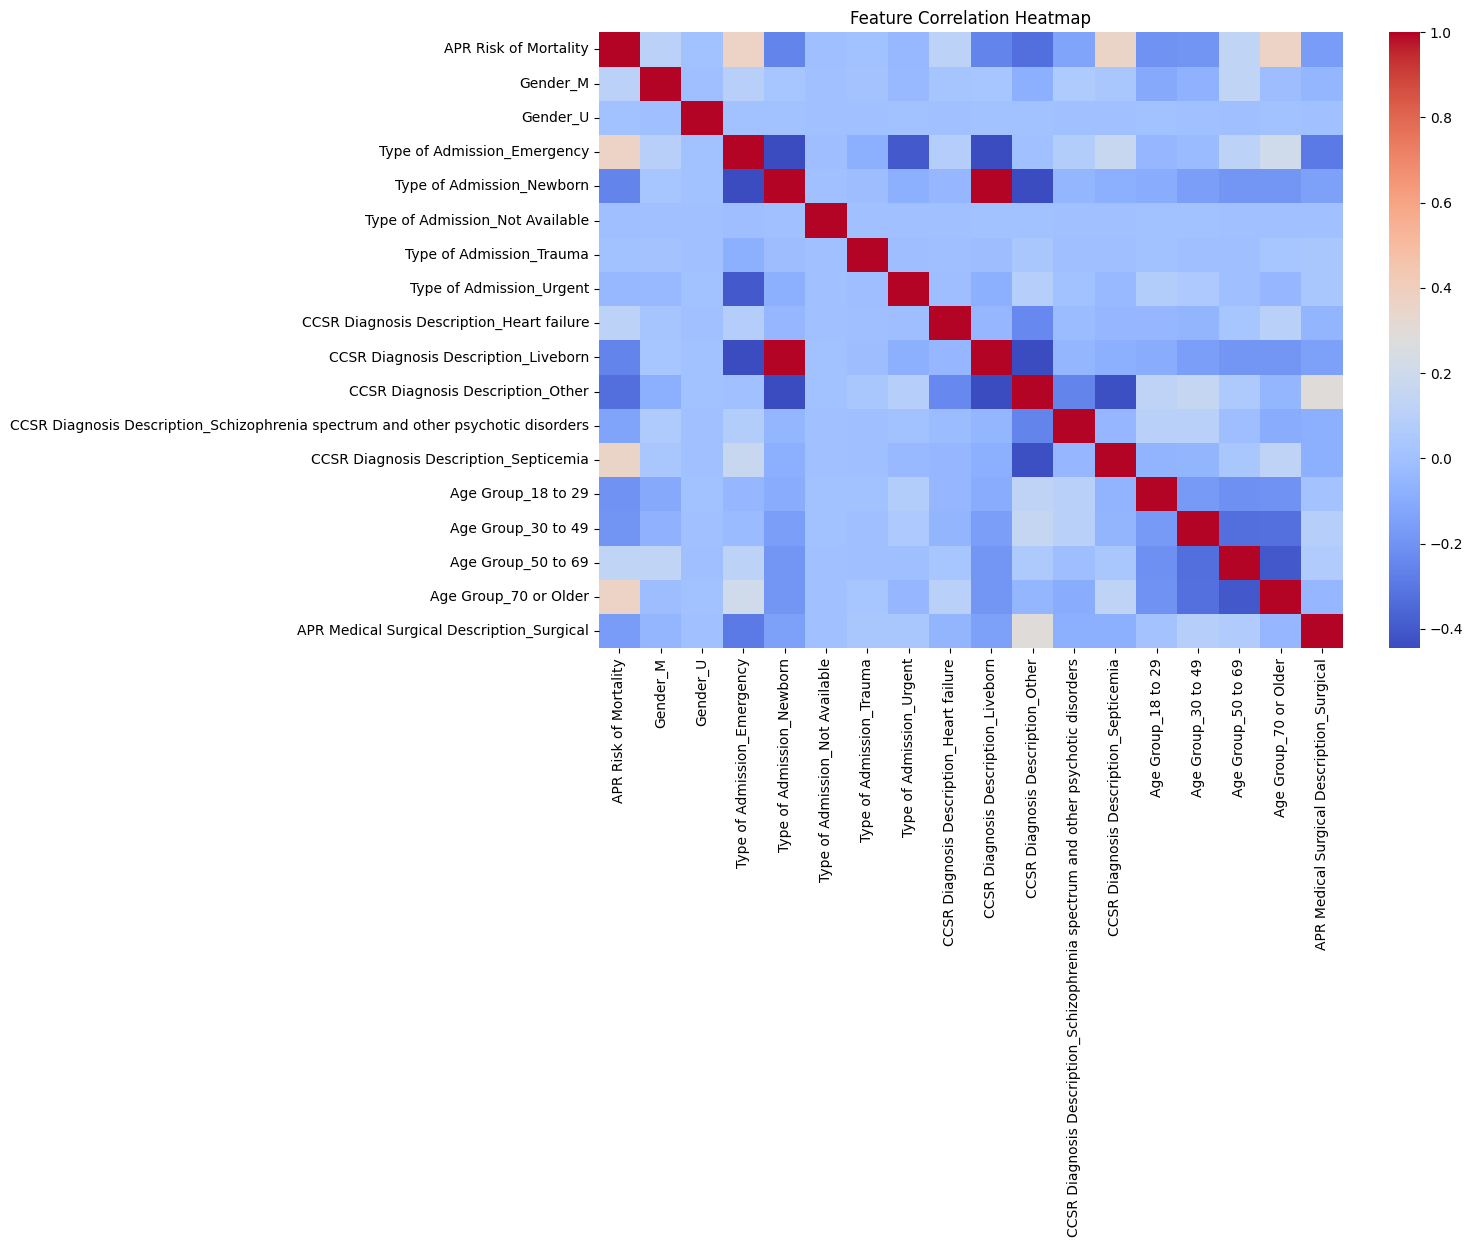

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

There are 2 higly correlated features. When the type of admission is "Newborn" and when the diagnosis is "Liveborn". These features are saying the exact same thing so there is no reason to keep both of them.

In [ ]:
X_train = X_train.drop(columns=["CCSR Diagnosis Description_Liveborn"])

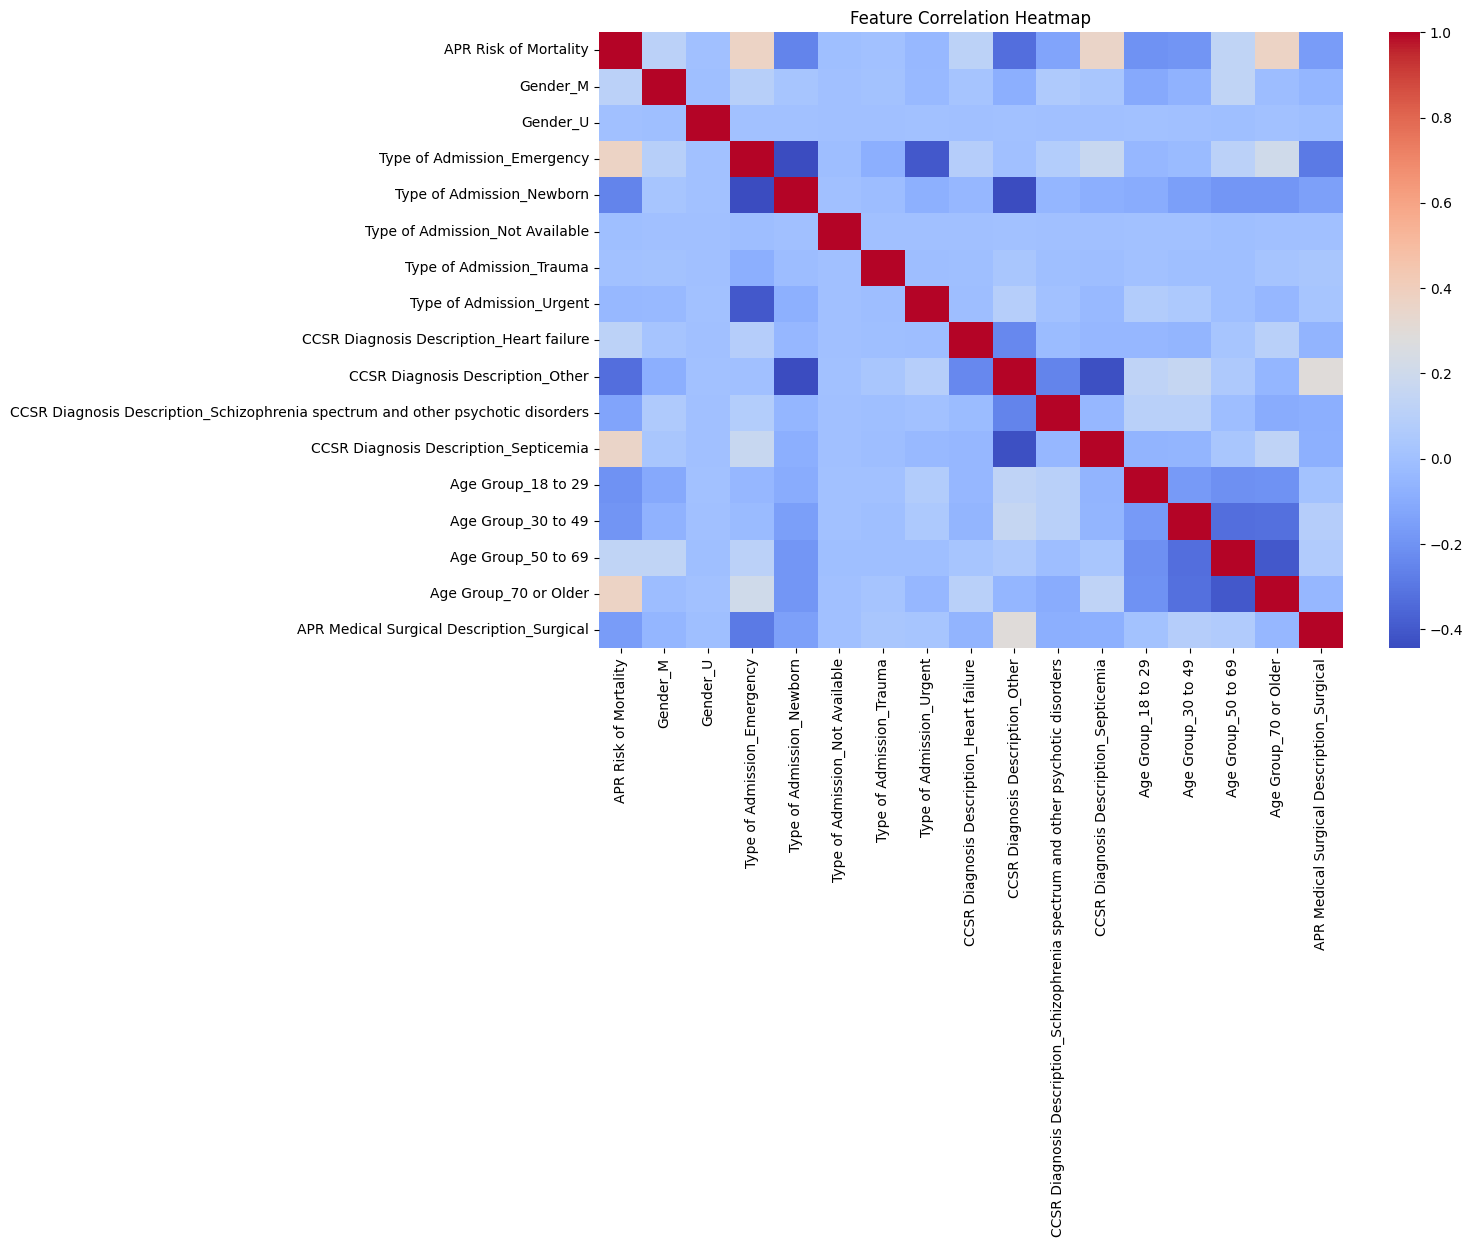

In [112]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Linear Regression

In [114]:
X = df_model.drop(columns='Length of Stay')
y = df_model['Length of Stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [119]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 8.04658074876669
R² Score: 0.15654578932161156


Overall, my model is off for about 8 days, and the model explains about 15% of variation of Length of Stay. This might be expected since Length of Stay is influenced by many other facotors.